In [44]:
import numpy as np
returns = []
years=range(25)
montecarlo = 10000
if years == range(25):
    net_cf_overtime = [[0]*montecarlo,[0]*montecarlo,[0]*montecarlo,[0]*montecarlo,[0]*montecarlo,[0]*montecarlo,[0]*montecarlo,[0]*montecarlo,[0]*montecarlo,[0]*montecarlo,[0]*montecarlo,[0]*montecarlo,[0]*montecarlo,[0]*montecarlo,[0]*montecarlo,[0]*montecarlo,[0]*montecarlo,[0]*montecarlo,[0]*montecarlo,[0]*montecarlo,[0]*montecarlo,[0]*montecarlo,[0]*montecarlo,[0]*montecarlo,[0]*montecarlo,[0]*montecarlo]
if years == range(15):
    net_cf_overtime = [[0]*montecarlo,[0]*montecarlo,[0]*montecarlo,[0]*montecarlo,[0]*montecarlo,[0]*montecarlo,[0]*montecarlo,[0]*montecarlo,[0]*montecarlo,[0]*montecarlo,[0]*montecarlo,[0]*montecarlo,[0]*montecarlo,[0]*montecarlo,[0]*montecarlo,[0]*montecarlo]

for N in range(montecarlo):
    sigma_beg = 0.007  # Standard deviation (0.7%)
    charter_2001 = 14747
    charter_2002 = charter_2001 * (1+np.random.normal(0.022, sigma_beg))
    charter = charter_2002
    tax_rate = 0
    tot_pres = 0
    mu_t__1 = -10
    mu_t__2 = -10
    infl_beg = 0.03
    sigma_beg_infl = 0.01
    WC = 500000
    delta_wc = 0
    for y in years:
        if y == 0:
            infl_actual = infl_beg
        else:
            infl_actual = 0.65 * infl_beg + 0.35 * infl_t1
        
        sigma_infl = sigma_beg_infl * np.log(2.72 + y/7)
        inflation_random = np.random.normal(infl_actual, sigma_infl)
        infl_t1 = inflation_random

        if y==0:
            expenses = 4000 * 365
        else:
            expenses = expenses * (1+inflation_random+0.01)
        
        if y<5:
            deprec = 1560000
        elif y<10:
            deprec = 1620000
        elif y<15:
            deprec = 1630000
        elif y<20:
            deprec = 1710000
        else:
            deprec = 1730000
        if y<4:
            multip = 1.15
        elif y <9:
            multip = 1.05
        elif y<14:
            multip = 1
        elif y<19:
            multip = 0.8
        elif y<24:
            multip = 0.75
        else:
            multip = 0.65

        if y<3:
            mu = 0.022 
        else:
            mu = 0.012
            if y == 3:
                mu_t__1 = -10
                mu_t__2 = -10
        
        if mu_t__1 != -10:
            if mu_t__2 != -10:
                rolling_mu = 0.7*mu + 0.25*mu_t__1 + 0.05*mu_t__2
            else:
                rolling_mu = 0.8*mu + 0.2*mu_t__1
        else:
            rolling_mu = mu


        sigma = sigma_beg * np.log(2.72 + y/7)
        random_return = np.random.normal(rolling_mu, sigma)             #rolling average: 0.75 weight * mu_estimated + 0.2 weight * mu_random_t-1 + 0.05 weight * mu_random_t-2
        charter = charter * (1+random_return)
        mu_t__2 = mu_t__1
        mu_t__1 = random_return

        if years==range(15): 
            if y==0:
                delta_wc = 500000
            elif y==14:
                delta_wc = -WC
            elif y!=0 and y!=14:
                delta_wc = WC*inflation_random
                WC = WC * (1+inflation_random)
        elif years==range(25):    
            if y==0:
                delta_wc = 500000
            elif y!=0 and y!=24:
                delta_wc = WC*inflation_random
                WC = WC * (1+inflation_random)
            elif y==24:
                delta_wc = -WC
        
        if y==0:
            revenues = 20000 * 357
        elif y == 1:
            revenues = 20200 * 357
        elif y == 2:
            revenues = 20400 * 357
        elif y<5:
            revenues = charter * 357 * multip
        elif y<10:
            revenues = charter * 353 * multip
        else:
            revenues = charter * 349 * multip
        
        EBIT = revenues - expenses - deprec
        if EBIT >=0:
            NI = EBIT * (1-tax_rate)
        else:
            NI = EBIT
        CFO = NI + deprec - delta_wc
        tot_pres += CFO/((1.09)**(y+2))
        
        for k in range(y, len(years)):
            net_cf_overtime[k+1][N] += CFO/((1.09)**(y+2))
    
    returns.append(tot_pres)


In [45]:
if years == range(15):
    total_outflow_capex = 32793565
elif years == range(25):
    total_outflow_capex = 34380960

profit = [x - total_outflow_capex for x in returns]
mean_prof = np.mean(profit)
print(mean_prof)

positive_count = 0
for n in profit:
    if n>0:
        positive_count += 1
print(positive_count/len(profit))


3644969.0156925684
0.9946


<Figure size 800x500 with 0 Axes>

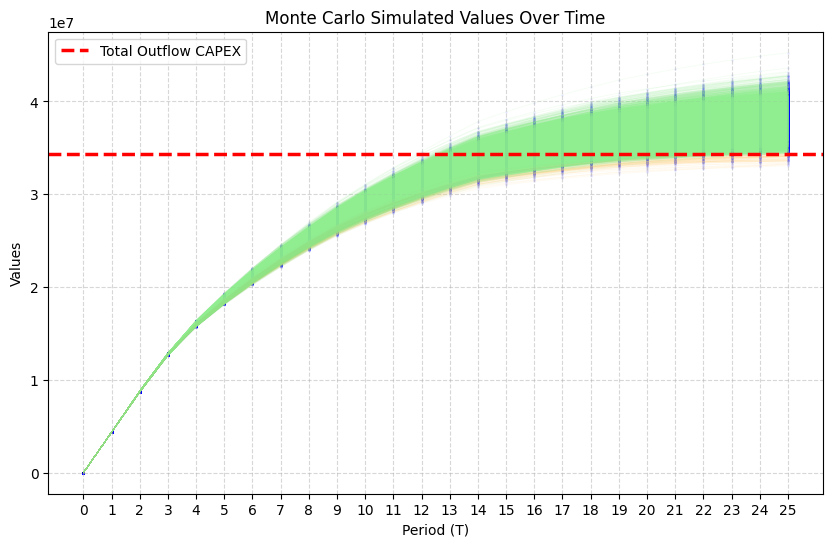

In [46]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))

if years == range(15):
    T_values = np.arange(16)
elif years == range(25):
    T_values = np.arange(26)

plt.figure(figsize=(10, 6))

# Scatter plot for each period
for i, period_values in enumerate(net_cf_overtime):
    T = T_values[i]  # x-position for this period
    plt.scatter([T] * len(period_values), period_values, alpha=0.05, s=1, color="blue")

# Line plot to connect values across time
if years == range(15):
    for j in range(montecarlo):  # Iterate over n=montecarlo trajectories
        trajectory = [net_cf_overtime[i][j] for i in range(16)]  # Collect j-th value over time
        
        # Check if the line is above or below the threshold
        if all(value < total_outflow_capex for value in trajectory):
            color = "#FFD580"  # Below the threshold
        else:
            color = "#90EE90"  # Mixed (crosses the threshold)

        plt.plot(T_values, trajectory, alpha=0.1, linewidth = 0.6, color=color)  # Draw the connection lines

elif years == range(25):
    for j in range(montecarlo):
        trajectory = [net_cf_overtime[i][j] for i in range(26)]
        
        if all(value < total_outflow_capex for value in trajectory):
            color = "#FFD580"
        else:
            color = "#90EE90"

        plt.plot(T_values, trajectory, alpha=0.1, linewidth = 0.6, color=color)

# Add a red thick horizontal line at total_outflow_capex
plt.axhline(y=total_outflow_capex, color='red', linewidth=2.5, linestyle='--', label="Total Outflow CAPEX")

# Labels and title
plt.xlabel("Period (T)")
plt.ylabel("Values")
plt.title("Monte Carlo Simulated Values Over Time")
plt.xticks(T_values)  # Ensure T values are correctly marked
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()  # Add a legend to label the red line

plt.show()